# Programming for Data Analysis - Project 2


Order of Business:
- ~~Join CO2 datasets into single pandas dataframe spanning 800K years to present.~~
- Join temperature datasets into single pandas dataframe spanning 800K years to present.
- Investigate Jouzel's temperature anomoly calculations.
- Join datasets for one other feature (CH4 or polar ice coverage) into single pandas dataframe spanning 800K years to present.
- Join datsets for temperature and rainfall in Ireland into single pandas dataframe.
- Join all above datsets into single pandas dataframe.
- Export datsets to csv and json formats.
- Graph CO2 vs temperature vs additional feature vs Irish data.
- Analyse the above for correlations, lead/lag, etc.
- Use linear regression to predict temperature change over coming decades.
- Look at recent data and analyse to see if recent increases have been linear or nonlinear.




Most recent CO2 data:
Lan, X., Tans, P. and K.W. Thoning: Trends in globally-averaged CO2 determined from NOAA Global Monitoring Laboratory measurements. Version 2023-12 https://doi.org/10.15138/9N0H-ZH07


In [1]:
# Import packages useful for data importing and analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a pandas datframe with IPCC CO2 data.
# co2_ipcc_clean.csv was created by taking data aggregate data and creating a new csv file using only that relevant data.
co2_ipcc = pd.read_csv('data/co2_ipcc_clean.csv')

# Column names for both datasets matched so they would join correctly. For some reason the first column of the IPCC dataset
# wouldn't change name so I used a different method.
co2_ipcc = co2_ipcc.rename(columns = {co2_ipcc.columns[0]:'year', 'CO2 (ppmv)':'mean', 'sigma mean CO2 (ppmv)':'sigma mean'})
co2_ipcc.head()

,year,mean,sigma mean
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04


In [3]:
# Create a pandas dataframe with NOAA data.

co2_noaa = pd.read_csv('data/co2_annmean_gl.csv', skiprows=37)
#co2_noaa

co2_noaa = co2_noaa.rename(columns = {'unc':'sigma mean'})

# Matching year column with IPCC data.
co2_noaa.iloc[:,0] = 1950 - co2_noaa.iloc[:,0]
co2_noaa.head()

,year,mean,sigma mean
0,-29,336.85,0.11
1,-30,338.91,0.07
2,-31,340.11,0.09
3,-32,340.85,0.03
4,-33,342.53,0.06


In [4]:
co2 = pd.concat([co2_noaa,co2_ipcc], ignore_index=True)
#co2 = [co2_noaa,co2_ipcc]
co2.head()
co2.tail()

,year,mean,sigma mean
1939,803709.25,202.65,1.04
1940,803925.28,202.92,2.06
1941,804009.87,207.50,0.92
1942,804522.67,204.86,1.64
1943,805132.44,202.23,0.69


In [5]:
temp_jouzel = pd.read_excel('data/temp_jouzel.xls')
temp_jouzel = temp_jouzel.drop(['bag', 'ztop', 'AICC2012', 'deutfinal', 'acc-EDC3beta'], axis=1)
temp_jouzel = temp_jouzel.rename(columns={'EDC3béta':'Age', 'temp':'Temperature'})
# Convert temperature from Kelvin to Celsius
# temp_jouzel.iloc[:,1] = temp_jouzel.iloc[:,1] - 273.15

# Finding average temperature of last 1000 years
avg_temp_range = (temp_jouzel.iloc[0:93,1])
avg_temp = (avg_temp_range.sum())/93
print(avg_temp)
temp_jouzel.tail()
#plt.plot(temp_jouzel['Age'], temp_jouzel['Temperature'])


217.38602150537636


,Age,Temperature
5814,816871.6,211.0
5815,817693.6,211.2
5816,818505.5,211.3
5817,819303.1,211.4
5818,820093.9,211.4


In [6]:
# Some minor cleaning of this file type was done to more easily import into the notebook. The .txt file was first downloaded,
# then extraneous data at the top of the file was removed.
# Data was then imported into excel, keeping format as Text to avoid losing data.
# The data was then exported from Excel as a CSV.

temp_noaa = pd.read_csv('data/temp_noaa_clean.csv')
temp_noaa = temp_noaa.drop(['Bag', 'ztop', 'Deuterium'], axis=1)
temp_noaa.iloc[:,1] = temp_noaa.iloc[:,1] + avg_temp

temp_noaa.tail()



,Age,Temperature
5795,797408.0,208.656022
5796,798443.0,208.846022
5797,799501.0,208.506022
5798,800589.0,208.466022
5799,801662.0,208.566022


In [9]:
temp = pd.concat([temp_noaa,temp_jouzel], ignore_index=True)
temp.sort_values('Age')
temp.tail()

,Age,Temperature
11614,816871.6,211.0
11615,817693.6,211.2
11616,818505.5,211.3
11617,819303.1,211.4
11618,820093.9,211.4


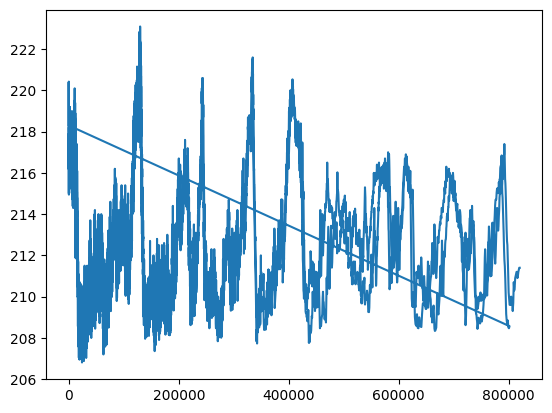

In [10]:
plt.plot(temp['Age'], temp['Temperature'])